## seaborn 사용하기

### seaborn 데이터셋

In [ ]:
## colab 한글
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus = False)

In [3]:
# titanic 데이터셋 종류
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

### **sns.regplot**: Plot data and a linear regression model fit.

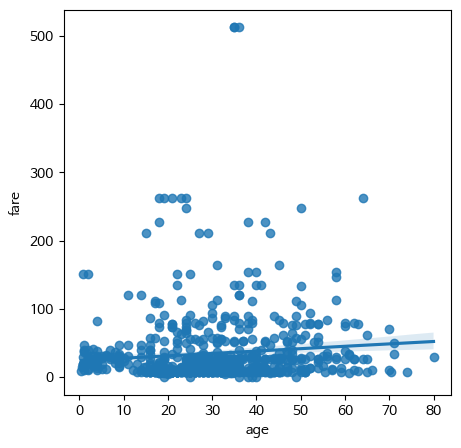

In [8]:
# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
fig, axs = plt.subplots(figsize = (5,5))
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic)  #회귀선 표시

fig.savefig("titanic_reg1.png") # 그래프 저장

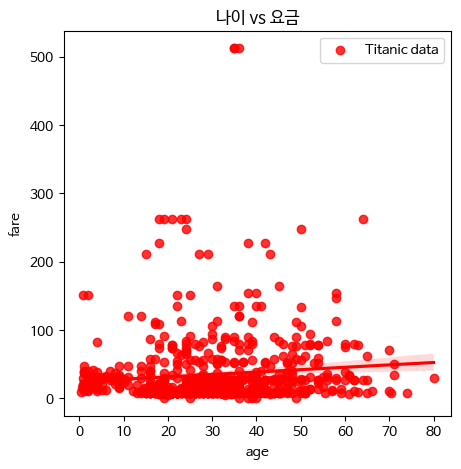

In [18]:
## Title
fig, axs = plt.subplots(figsize = (5,5))
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            fit_reg=True,
            color = "red",
            marker = "o",
            order = 1,
            label = "Titanic data")  #회귀선 표시
plt.title("나이 vs 요금")
plt.legend(loc = 0)
plt.show()

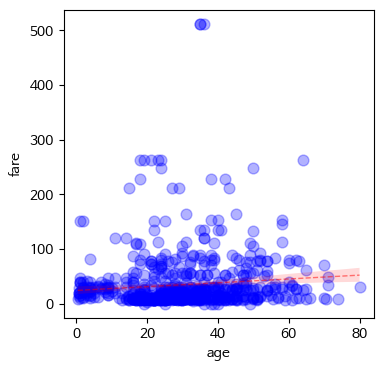

In [10]:
## {scatter,line}_kws
fig, axs = plt.subplots(figsize = (4,4))
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,
            scatter_kws={"fc":"b", "ec":"b", "s":60, "alpha":0.3},
            line_kws={"lw":1, "ls":"--","alpha":0.5, "color":"red"})
plt.show()

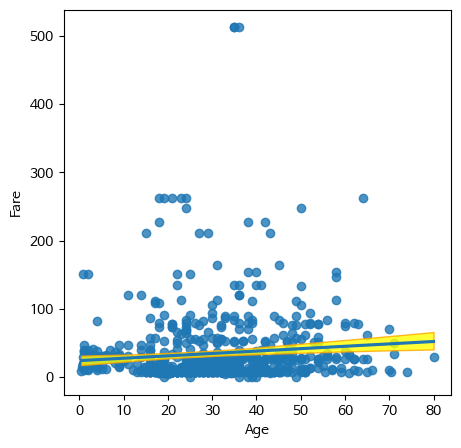

In [20]:
## ci.set
fig, axs = plt.subplots(figsize = (5,5))
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic)
ci = axs.get_children()[2]                   # confidence band 추출
ci.set(fc="yellow", ec="orange", alpha=0.8) # face & edge color, alpha 조정
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### **sns.lmplot**: Regression models across conditional subsets of a dataset.

In [22]:
## Penguins dataset
penguins = sns.load_dataset("penguins")
print(penguins.head())
print(penguins.info())
penguins['sex'].value_counts(dropna=False)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

sex
Male      168
Female    165
NaN        11
Name: count, dtype: int64

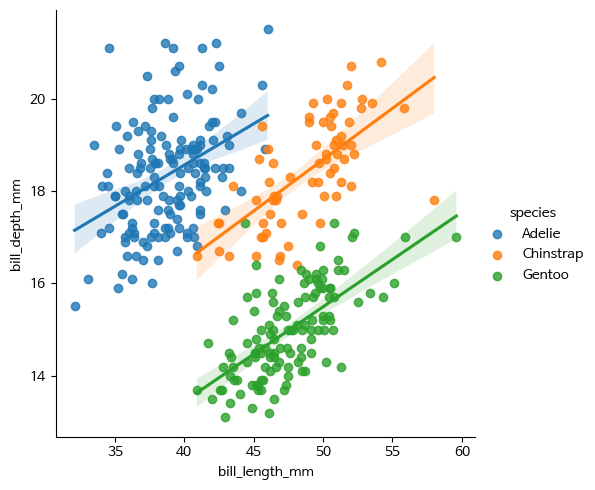

In [ ]:
sns.lmplot(data=penguins,
           x="bill_length_mm",
           y="bill_depth_mm",
           hue="species")
plt.show()

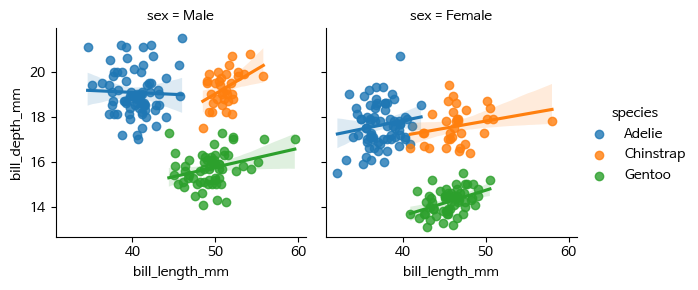

In [23]:

sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    hue="species", col="sex", height=3)
plt.show()

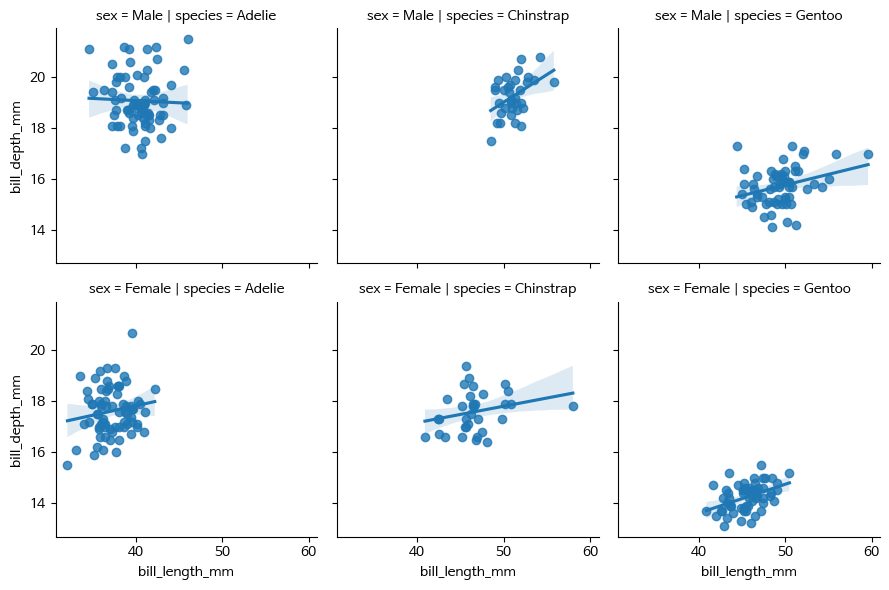

In [24]:
# Condition across two variables using both columns and rows:
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    col="species", row="sex", height=3,
)
plt.show()

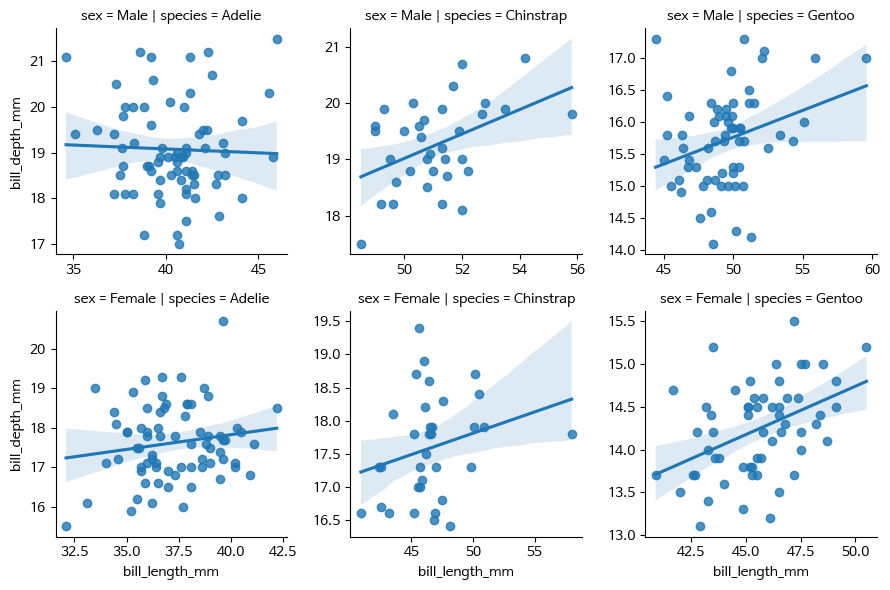

In [25]:
# Allow axis limits to vary across subplots:
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    col="species", row="sex", height=3,
    aspect=1,
    # facet_kws=dict(sharex=False, sharey=False),
    facet_kws = {"sharex":False,
                 "sharey":False}
)
plt.show()

### sns.scatter: Draw a scatter plot with possibility of several semantic groupings

In [27]:
## load tips data
tips = sns.load_dataset('tips')
print(tips.head())
print(tips.info())
print(tips.describe())
tips_category = tips.select_dtypes(include="category")
print(tips_category['sex'].value_counts())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


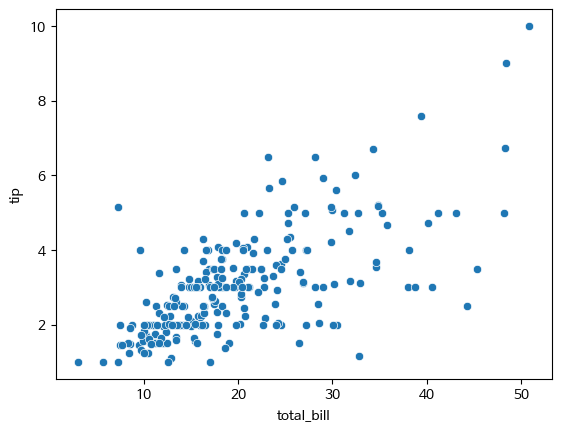

In [28]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.show()

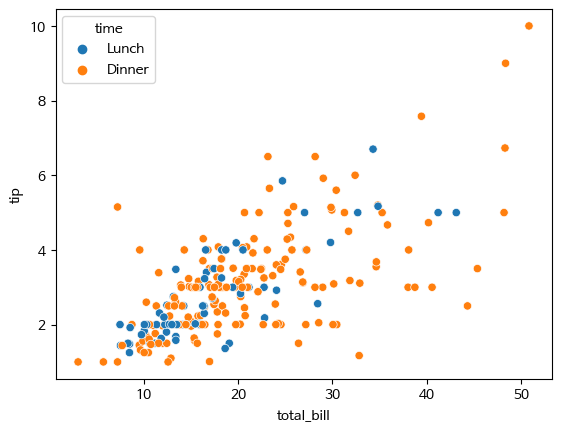

In [ ]:
# Assigning a variable to hue will map its levels to the color of the points:

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
plt.show()

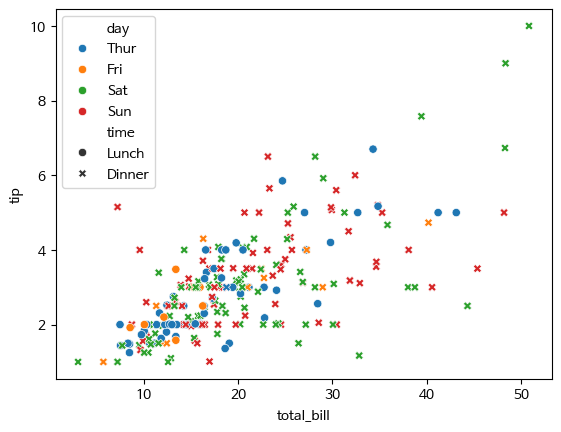

In [29]:
# Assigning hue and style to different variables will vary colors and markers independently:

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time", s = 50)
plt.show()

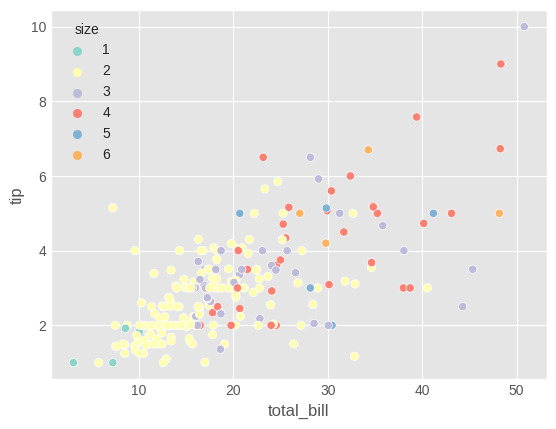

In [31]:
# the variable assigned to hue is numeric
# plt.style.use('ggplot')
## https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

sns.color_palette()
## https://seaborn.pydata.org/generated/seaborn.color_palette.html

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="Set3")
plt.show()

In [32]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]